Project 1: Writing a Data Scientist Blog Post

Boston Airbnb Data

Import required packages:

In [1161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import zipfile
%matplotlib inline

Get familiar with the contents of the calendar file.

In [1162]:
# Open calendar data file
calendar_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\calendar.csv"
calendar = pd.read_csv(calendar_path)
# View top five rows
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [1163]:
# How big is the dataset?
calendar.shape # 4 columns : 1,308,890 rows of data

(1308890, 4)

In [1164]:
# What data types are included in this dataset?
calendar.dtypes # Why is price listed as an object?

listing_id     int64
date          object
available     object
price         object
dtype: object

In [1165]:
# Count null values
calendar.isnull().sum() # 665,853 null values in price column

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [1166]:
# Determine proportion of null values
calendar.isnull().mean() # 50.8716% null values in price column

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [1167]:
# Look at descriptive statistics for each field
calendar.describe(include='all') # statistics not very useful - only listing_id is an int field, others are object fields

,listing_id,date,available,price
count,1.308890e+06,1308890,1308890,643037
unique,NaN,365,2,1246
top,NaN,2016-09-06,f,$150.00
freq,NaN,3586,665853,20752
mean,8.442118e+06,NaN,NaN,NaN
std,4.500149e+06,NaN,NaN,NaN
min,3.353000e+03,NaN,NaN,NaN
25%,4.679319e+06,NaN,NaN,NaN
50%,8.578710e+06,NaN,NaN,NaN
75%,1.279603e+07,NaN,NaN,NaN


Clean up calendar file.

In [1168]:
# Change date field from object to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.dtypes # confirm change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [1169]:
# price field has object dtype due to $ character
# Remove $ from beginning of each string
calendar['price'] = calendar['price'].str.replace("$", "")
calendar['price'].value_counts()

price
150.00      20752
65.00       17518
75.00       16249
100.00      15499
200.00      14326
            ...  
1,056.00        1
1,381.00        1
1,707.00        1
2,080.00        1
1,810.00        1
Name: count, Length: 1246, dtype: int64

In [1170]:
# Convert price field to numeric
calendar['price'] = pd.to_numeric(calendar['price'], errors= "coerce")
calendar.dtypes # confirm change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

Visualize the cleaned calendar data.

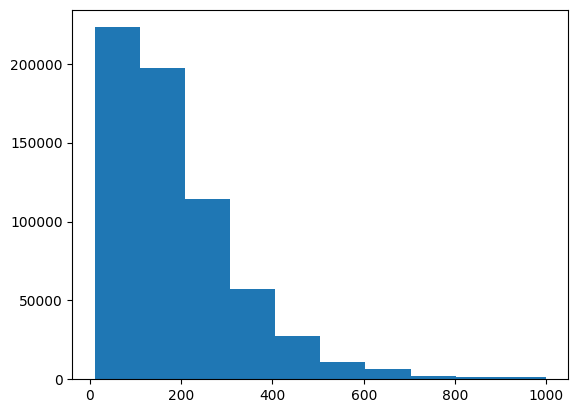

In [1171]:
plt.hist(calendar['price']);
# right skewed distribution

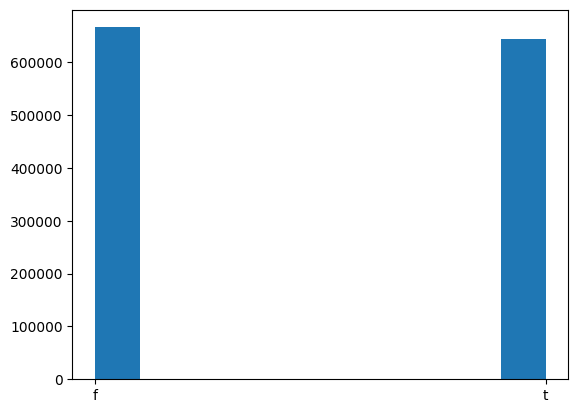

In [1172]:
plt.hist(calendar['available']);
# Fairly equal distribution of T and F values

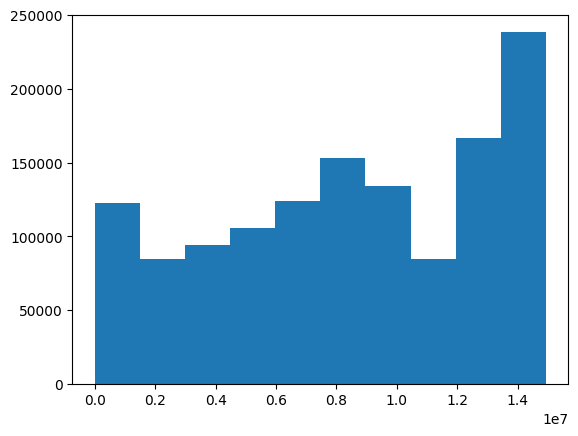

In [1173]:
plt.hist(calendar['listing_id']);
# can't determine much from this distribution

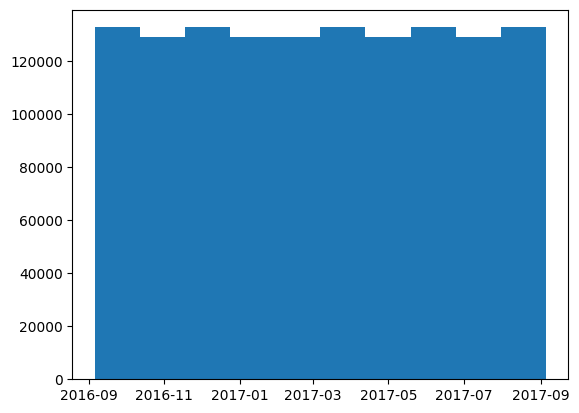

In [1174]:
plt.hist(calendar['date']);
# not helpful at all

Question 1: How does seasonal variation impact Boston AirBnB booking prices?

In [1175]:
# use calendar dataset
# extract month and year from 'date' column and store as new columns
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
calendar.head()

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,f,NaN,9,2017
1,12147973,2017-09-04,f,NaN,9,2017
2,12147973,2017-09-03,f,NaN,9,2017
3,12147973,2017-09-02,f,NaN,9,2017
4,12147973,2017-09-01,f,NaN,9,2017


In [1176]:
calendar.isnull().mean()
# 51% of the price values are null

listing_id    0.000000
date          0.000000
available     0.000000
price         0.510678
month         0.000000
year          0.000000
dtype: float64

In [1177]:
# filter out available AirBnBs so that we're only looking at booked records
calendar_booked = calendar[calendar['available'] == 'f']
calendar_booked.head()

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,f,NaN,9,2017
1,12147973,2017-09-04,f,NaN,9,2017
2,12147973,2017-09-03,f,NaN,9,2017
3,12147973,2017-09-02,f,NaN,9,2017
4,12147973,2017-09-01,f,NaN,9,2017


In [1178]:
calendar_booked.isnull().mean()
# 100% of price values are null for records where available = f
# this makes sense because the property is unavailable, so there is no price to rent

listing_id    0.0
date          0.0
available     0.0
price         1.0
month         0.0
year          0.0
dtype: float64

In [1179]:
calendar_available = calendar[calendar['available'] == 't']
calendar_available.head()

,listing_id,date,available,price,month,year
365,3075044,2017-08-22,t,65.0,8,2017
366,3075044,2017-08-21,t,65.0,8,2017
367,3075044,2017-08-20,t,65.0,8,2017
368,3075044,2017-08-19,t,75.0,8,2017
369,3075044,2017-08-18,t,75.0,8,2017


In [1180]:
calendar_available.isnull().mean()
# only 0.3% of price values are null for dates when the property is available
calendar_available.isnull().sum()


listing_id       0
date             0
available        0
price         2568
month            0
year             0
dtype: int64

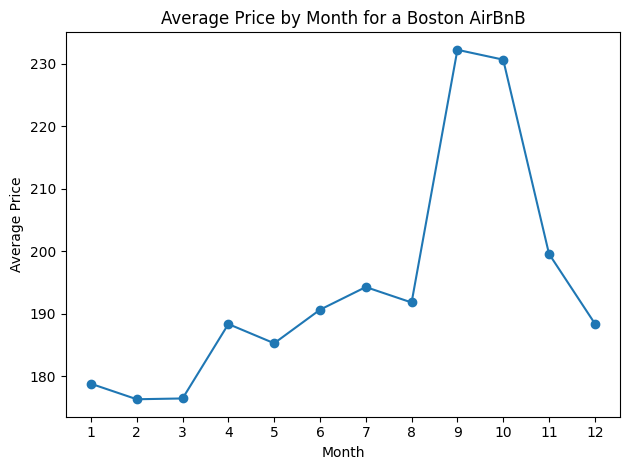

In [ ]:
# plot the average price by month
mean_monthly_price = calendar.groupby('month')['price'].mean().reset_index()
plt.plot(mean_monthly_price['month'], mean_monthly_price['price'], marker = 'o')
plt.title('Average Price by Month for a Boston AirBnB')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(np.arange(1, 13, 1))
plt.tight_layout()
plt.show()
# highest average prices are in september and october, respectively

Get familiar with listings file. 

In [ ]:
# Open listings data file
listings_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\listings.csv"
listings = pd.read_csv(listings_path)
# View top five rows
print(listings.head()) # lots of data here

In [ ]:
# How big is this dataset?
listings.shape # 95 columns : 3,585 rows

In [ ]:
listings.columns # look at column names

In [ ]:
listings.describe(include='all')

In [ ]:
# How many nulls? What proportion of nulls? What are the column types?
for column in listings.columns:
    num_null = listings[column].isnull().sum()
    prop_null = listings[column].isnull().mean()
    col_type = listings[column].dtype
    print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))

Clean up listings file.

In [898]:
# Drop text-heavy columns (not sure how to clean these up for this analysis)
# Drop URL fields
# Remove location fields unlikely to be helpful in analysis
# Lat and Long 
listings_filtered['country'].value_counts()
# country has one value: United States
listings_filtered['country_code'].value_counts()
# country_code has one value: US
# street
listings_filtered['state'].value_counts()
# state has one value: MA
listings_filtered['market'].value_counts()
# most in Boston, but 1 in San Francisco, 1 in Other (Domestic), and 1 in Other (International)
# city, zipcode, smart_location, neighbourhood, and neighbourhood_cleansed all contain similar info - keep only one
# is_location_exact doesn't seem particularly helpful
listings_filtered['jurisdiction_names'].isnull().mean()
# all values are null

# Remove additional fields with negligent value in analysis
listings_filtered['last_scraped'].value_counts()
# last_scraped has one value: 2016-09-07
listings_filtered['calendar_last_scraped'].value_counts()
# calendar_last_scraped has one value:2016-09-06
listings_filtered['scrape_id'].value_counts()
# scrape_id has one value:20160906204935
listings_filtered['experiences_offered'].value_counts()
# experiences_offered has one value: none
listings_filtered['id'].value_counts()
# every id appears only once
# host_id
listings_filtered['has_availability'].isnull().mean()
listings_filtered['neighbourhood_group_cleansed'].isnull().mean()
listings_filtered['license'].isnull().mean()
# all rows are null
# not too interested in host_location or host_neighbourhood

listings_filtered = listings.drop(['description', 'summary', 'space', 'neighborhood_overview', 'notes', 
                                   'transit', 'access', 'interaction', 'house_rules', 'host_about', 
                                   'name', 'host_name', 'host_verifications', 'amenities',
                                   'host_thumbnail_url', 'listing_url', 'thumbnail_url', 'host_url', 
                                   'host_picture_url', 'medium_url', 'picture_url', 'xl_picture_url',
                                   'latitude', 'longitude', 'country', 'country_code', 'street', 'state', 
                                   'market', 'neighbourhood', 'smart_location', 'is_location_exact', 'city', 
                                   'zipcode', 'jurisdiction_names', 'last_scraped', 'calendar_last_scraped', 
                                   'scrape_id', 'id', 'experiences_offered', 'host_id', 'has_availability', 
                                   'neighbourhood_group_cleansed', 'license', 'host_location',
                                   'host_neighbourhood'], axis = 1)

In [ ]:
# Let's recheck:
# How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))

In [ ]:
listings_filtered.columns

In [ ]:
# Why are price fields considered object type? Let's fix this.
listings_filtered[['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].head()

In [ ]:
# price field has object dtype due to $ character
# Remove $ from beginning of each string
listings_filtered['weekly_price'] = listings_filtered['weekly_price'].str.replace("$", "")
listings_filtered['monthly_price'] = listings_filtered['monthly_price'].str.replace("$", "")
listings_filtered['security_deposit'] = listings_filtered['security_deposit'].str.replace("$", "")
listings_filtered['cleaning_fee'] = listings_filtered['cleaning_fee'].str.replace("$", "")
listings_filtered['extra_people'] = listings_filtered['extra_people'].str.replace("$", "")
listings_filtered['price'] = listings_filtered['price'].str.replace("$", "")

listings_filtered[['weekly_price', 'monthly_price', 'security_deposit', 
                   'cleaning_fee', 'extra_people', 'price']].head() # confirm changes worked correctly

In [ ]:
# Why is host response rate an object?
listings_filtered['host_response_rate'].head()

In [ ]:
# host_response_rate field has object dtype due to % character
# Remove % from end of each string
listings_filtered['host_response_rate'] = listings_filtered['host_response_rate'].str.replace("%", "")

listings_filtered['host_response_rate'].head() # confirm changes worked correctly

In [ ]:
# Why is host acceptance rate an object?
listings_filtered['host_acceptance_rate'].head()

In [ ]:
# host_acceptance_rate field has object dtype due to % character
# Remove % from end of each string
listings_filtered['host_acceptance_rate'] = listings_filtered['host_acceptance_rate'].str.replace("%", "")

listings_filtered['host_acceptance_rate'].head() # confirm changes worked correctly

In [ ]:
# Convert price and fee fields to numeric type
listings_filtered['weekly_price'] = pd.to_numeric(listings_filtered['weekly_price'], errors= "coerce")
listings_filtered['monthly_price'] = pd.to_numeric(listings_filtered['monthly_price'], errors= "coerce")
listings_filtered['security_deposit'] = pd.to_numeric(listings_filtered['security_deposit'], errors= "coerce")
listings_filtered['cleaning_fee'] = pd.to_numeric(listings_filtered['cleaning_fee'], errors= "coerce")
listings_filtered['extra_people'] = pd.to_numeric(listings_filtered['extra_people'], errors= "coerce")
listings_filtered['price'] = pd.to_numeric(listings_filtered['price'], errors= "coerce")


# Convert host_response_rate and host_acceptance_rate to numeric type
listings_filtered['host_response_rate'] = pd.to_numeric(listings_filtered['host_response_rate'], errors= "coerce")
listings_filtered['host_acceptance_rate'] = pd.to_numeric(listings_filtered['host_acceptance_rate'], errors= "coerce")


listings_filtered.dtypes # confirm change was successful

In [ ]:
# Post-filtering and cleaning: How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    if num_null > 0:
        print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))
    else:
        continue

Question 2: Which property characteristics are the best predictors of price?

Impute missing values for numeric fields.

In [ ]:
listings_num_vars = listings_filtered.select_dtypes(include=['float', 'int']).columns
for col in listings_num_vars:
    listings_filtered[col].fillna((listings_filtered[col].mean()), inplace = True)

In [ ]:
# Post-filtering and cleaning: How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    if num_null > 0:
        print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))
    else:
        continue

Get familiar with reviews file.

In [ ]:
# Import reviews dataset
reviews_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\reviews.csv"
reviews = pd.read_csv(reviews_path)

# View top five rows
print(reviews.head())

In [ ]:
# How big is this dataset?
reviews.shape # 6 columns : 68,275 rows

In [ ]:
reviews.value_counts()

In [ ]:
reviews.isnull().mean()
reviews.isnull().sum()
# 53 rows missing comments - no way to impute values

In [ ]:
reviews['reviewer_id'].value_counts()
# not sure what to do with this information...looks like the listings file will be more useful for modeling

In [ ]:
listings_filtered.columns

In [922]:
prop_char = listings_filtered[['neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'cancellation_policy']]

In [ ]:
prop_char.head()

In [ ]:
y = prop_char['price']
prop_drop = prop_char.drop(['price'], axis = 1)
num_vars = prop_drop.select_dtypes(include = ['float', 'int']).columns
cat_vars = prop_drop.select_dtypes(include = ['object']).copy().columns


In [ ]:
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
axes[0, 0].scatter(listings_filtered['host_response_rate'], listings_filtered['price'])
axes[0, 0].set_title('Host Response v. Price')
axes[0, 0].set_xlabel('Host Response Rate')
axes[0, 0].set_ylabel('Price')
# weak, possibly non-linear, positive correlation
axes[0, 1].scatter(listings_filtered['review_scores_value'], listings_filtered['price'])
axes[0, 1].set_title('Price v. Review Value')
axes[0, 1].set_xlabel('Price')
# weak, possibly non-linear, positive correlation
axes[1, 0].scatter(listings_filtered['calculated_host_listings_count'], listings_filtered['price'])
# does not appear to be any relationship
axes[1, 1].scatter(listings_filtered['bedrooms'], listings_filtered['price'])
# unclear correlation
axes[2, 0].scatter(listings_filtered['bathrooms'], listings_filtered['price'])
# unclear correlation
axes[2, 1].scatter(listings_filtered['number_of_reviews'], listings_filtered['price'])
# possible non-linear negative correlation
axes[3, 0].scatter(listings_filtered['host_acceptance_rate'], listings_filtered['price'])
# possible non-linear positive correlation
axes[3, 1].scatter(listings_filtered['accommodates'], listings_filtered['price'])
# unclear correlation
axes[4, 0].scatter(listings_filtered['availability_365'], listings_filtered['price'])
# possible non-linear correlation
axes[4, 1].scatter(listings_filtered['square_feet'], listings_filtered['price'])
# weak positive correlation

In [ ]:
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
axes[0, 0].scatter(listings_filtered['host_response_rate'], listings_filtered['review_scores_rating'])
axes[0, 0].set_title('Host Response v. Review Rating')
axes[0, 0].set_xlabel('Host Response Rate')
axes[0, 0].set_ylabel('Review Scores Rating')
# does not appear to be a strong relationship, possible non-linear negative correlation?
axes[0, 1].scatter(listings_filtered['price'], listings_filtered['review_scores_rating'])
axes[0, 1].set_title('Price v. Review Rating')
axes[0, 1].set_xlabel('Price')
# appears to be a non-linear positive correlation
axes[1, 0].scatter(listings_filtered['calculated_host_listings_count'], listings_filtered['review_scores_rating'])
# does not appear to be any relationship
axes[1, 1].scatter(listings_filtered['bedrooms'], listings_filtered['review_scores_rating'])
# some positive correlation
axes[2, 0].scatter(listings_filtered['bathrooms'], listings_filtered['review_scores_rating'])
# some positive correlation
axes[2, 1].scatter(listings_filtered['number_of_reviews'], listings_filtered['review_scores_rating'])
# possible non-linear positive correlation
axes[3, 0].scatter(listings_filtered['host_acceptance_rate'], listings_filtered['review_scores_rating'])
# possible non-linear negative correlation
axes[3, 1].scatter(listings_filtered['accommodates'], listings_filtered['review_scores_rating'])
# possible non-linear positive correlation
axes[4, 0].scatter(listings_filtered['availability_365'], listings_filtered['review_scores_rating'])
# no apparent correlation
axes[4, 1].scatter(listings_filtered['square_feet'], listings_filtered['review_scores_rating'])


In [ ]:
listings_filtered['property_type'].value_counts()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10, 5))
listings_filtered.sort_values(by='price')

axes[0,0].bar(listings_filtered['bed_type'], listings_filtered['review_scores_rating'])
axes[0,1].bar(listings_filtered['neighbourhood_cleansed'], listings_filtered['review_scores_rating'])
axes[1,1].bar(listings_filtered['neighbourhood_cleansed'], listings_filtered['price'])
axes[1,1].tick_params(axis = 'x', rotation=90)
# certain neighborhoods appear to have higher prices
axes[1,0].bar(listings_filtered['property_type'], listings_filtered['price'])



In [ ]:
dtypes = listings.dtypes
dtypes
l_num_vars = listings.select_dtypes(include='number')
l_num_vars.columns


In [ ]:
# Do hosts with more listings have higher ratings?

plt.scatter(l_num_vars['host_listings_count'], l_num_vars['review_scores_rating']); # not a strong correlation or relationship

In [ ]:
# Do hosts with more monthly reviews have higher ratings?

plt.scatter(l_num_vars['reviews_per_month'], l_num_vars['review_scores_rating']); # apparent positive but non-linear relationship

In [ ]:
l_num_vars[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability']].head()

In [ ]:
plt.subplot(l_num_vars['reviews_per_month'], l_num_vars[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability']]);

Question 2: How do fees impact bookings?

Question 3: How do host characteristics impact bookings and reviews?